# Rule Fit applied to General Dataset

#### Made by:
* Teresa Marcelino (teresamarcelino98@gmail.com)


-------




In [1]:
%store -r Model_GeneralSynthetic
%store -r Best_Parameters_Regularizers_general


In [2]:
%store -r Genenal_Dataset

----



## 1. Load Data and Libraries  <a class="anchor" id="1"></a> 


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import shap
import matplotlib.pyplot as plt
#from rulefit import RuleFit

import sklearn

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
#Encoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *
import matplotlib
import copy
from datetime import datetime

from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

from tabulate import tabulate
import pickle
import math

In [4]:
import RuleFit_withoutCV as RuleFit_withoutCV

import RuleFit_customized as RuleFit_custom
from rulefit import RuleFit 
import pyowl
from pyowl import OwlRegressor

In [5]:
df_test_general = pd.read_csv('Data_test',header='infer')
df_test_general


,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia
0,0,0,0,4,78,1,41,65.0,60,84.799861,74.987601,68.701950,62.910761,64.647143,79.264845,82.362462,79.007678
1,0,0,0,1,28,3,55,71.0,60,68.580158,79.510016,68.701950,29.501126,49.730159,81.234219,80.683935,93.552812
2,0,1,0,1,34,1,12,71.0,60,68.580158,79.510016,68.701950,29.501126,49.730159,79.227901,80.683935,93.552812
3,0,0,1,2,123,1,53,66.0,60,97.069451,73.699808,68.701950,128.531250,75.286885,78.038784,82.362462,93.552812
4,0,0,1,4,65,1,55,36.0,30,97.069451,79.510016,68.701950,82.114754,84.685590,77.612903,81.861779,79.007678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16972,0,1,0,3,572,1,19,50.0,20,25.177548,74.987601,82.238419,34.984542,17.152401,76.679079,80.683935,36.332970
16973,0,1,0,1,87,1,90,71.0,90,35.231121,84.140671,82.238419,89.062497,51.345679,78.038784,76.818586,93.552812
16974,0,1,0,2,1040,1,94,54.0,60,84.799861,84.140671,82.238419,34.984542,83.589057,81.234219,76.818586,36.332970
16975,0,1,0,4,1064,2,33,47.0,60,84.799861,74.987601,82.238419,34.984542,83.589057,80.393772,76.818586,36.332970


In [6]:
df_train_general = pd.read_csv('Data_withsyntheticdata',header='infer')
df_train_general

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,Speciality,Part of the day,CUF_Unit,I1,Doctor,Month,Weekday,Anesthesia
0,0,0,1,1.0,41.0,6.0,77.000000,37.000000,120.0,97.069451,74.987601,78.128355,93.099476,82.670732,81.234219,82.362462,93.552812
1,0,0,0,1.0,21.0,2.0,416.034799,40.520910,NaN,262.252736,73.324830,78.130504,287.028080,332.458894,77.102209,78.431549,93.553642
2,0,1,0,1.0,50.0,1.0,89.000000,51.000000,120.0,84.256971,74.987601,78.128355,79.983092,88.803030,81.234219,70.277298,93.552812
3,0,0,1,1.0,50.0,2.0,250.407118,49.218030,NaN,82.567073,73.103264,66.071896,149.565249,95.199062,77.572655,80.738678,93.552795
4,0,0,0,2.0,582.0,1.0,201.150325,48.518027,NaN,120.894741,79.509385,82.237459,215.999914,99.760261,80.619020,81.418207,93.553054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271345,0,0,1,1.0,257.0,1.0,251.807383,65.707146,NaN,82.921078,84.140462,86.889791,128.670750,114.863414,79.803042,84.132825,93.551394
271346,0,1,0,1.0,358.0,1.0,46.000000,78.000000,30.0,35.231121,84.140671,79.016582,29.376488,36.176944,77.612903,76.818586,93.552812
271347,0,0,0,1.0,159.0,2.0,141.657147,58.706775,NaN,83.723270,84.139940,88.023187,130.374364,65.218425,78.364937,81.646207,93.551412
271348,0,0,1,1.0,65.0,1.0,385.615126,44.288318,NaN,87.366332,80.822577,89.971731,182.786803,140.116212,79.279763,81.342475,93.551177


----


## 1. general-specific RuleFit  <a class="anchor" id="1"></a> 

### 1.1.  Split Data  <a class="anchor" id="1.1"></a> 

In [7]:
train_dataset_general= df_train_general
test_dataset_general = df_test_general


train_features_general = train_dataset_general.copy()
test_features_general = test_dataset_general.copy()

train_labels_general = train_features_general.pop('Real Room Duration')
test_labels_general = test_features_general.pop('Real Room Duration')

train_CUF_labels_general = train_features_general.pop('CUF Planned Duration')
test_CUF_labels_general= test_features_general.pop('CUF Planned Duration')


#Resolve issue "Failed to convert a NumPy array to a Tensor (Unsupported object type int)""
generalcolumns=train_features_general.columns
#Dataset
train_dataset_general= np.asarray(train_dataset_general).astype(np.float32)
test_dataset_general = np.asarray(test_dataset_general).astype(np.float32)

#Features
train_features_general= np.asarray(train_features_general).astype(np.float32)
test_features_general = np.asarray(test_features_general).astype(np.float32)

#labels
train_labels_general = np.asarray(train_labels_general).astype(np.float32)
test_labels_general = np.asarray(test_labels_general).astype(np.float32)


#CUF
train_CUF_labels_general = np.asarray(train_CUF_labels_general).astype(np.float32)
test_CUF_labels_general = np.asarray(test_CUF_labels_general).astype(np.float32)


### 1.2.  Parameters Tuning  <a class="anchor" id="1.2"></a> 




In [8]:
Tuning_models = {'Library_Script':['RuleFit_custom',
                                  'RuleFit_withoutCV'], 
                 'Decision_Tree':[RandomForestRegressor,
                                  GradientBoostingRegressor,
                                  BaggingRegressor,
                                  ExtraTreesRegressor],
                 'Regularizers_0':['LassoCV','ElasticNetCV','Pyowl'],
                 'Regularizers_1':['Lasso','ElasticNet','Pyowl'],
                 'Alphas':np.logspace(-8, math.log(3,10), 1000,base=10), #between 10^-7 and 3
                }

Tuning_models.update({'Cs':1./Tuning_models['Alphas']})

In [9]:
Best_Parameters_Decison_Tree_general= {}

for i in Tuning_models['Decision_Tree']:
    # The Normalization layer
    Best_Parameters_Decison_Tree_general[i] = {} 

In [10]:
Parameters_RandomForestRegressor = {'n_estimators':[100,250,500,750,1000,1250,1500,1750],
              'max_depth':[3,4]}

Parameters_GradientBoostingRegressor = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
                                        'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                                        'max_depth':[3,4]}

Parameters_BaggingRegressor = {'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                               'base_estimator__max_depth':[3,4]}

Parameters_ExtraTreesRegressor = {'n_estimators':[100,250,500,750,1000,1250,1500,1750],
                                  'max_depth':[3,4]}

Best_Parameters_Decison_Tree_general[Tuning_models['Decision_Tree'][0]].update({"Search_Parameters": Parameters_RandomForestRegressor})
Best_Parameters_Decison_Tree_general[Tuning_models['Decision_Tree'][1]].update({"Search_Parameters": Parameters_GradientBoostingRegressor})
Best_Parameters_Decison_Tree_general[Tuning_models['Decision_Tree'][2]].update({"Search_Parameters": Parameters_BaggingRegressor})
Best_Parameters_Decison_Tree_general[Tuning_models['Decision_Tree'][3]].update({"Search_Parameters": Parameters_ExtraTreesRegressor})




In [24]:
Model_GeneralSynthetic={} #creation of dictionaries for all 442 models 

for j in Tuning_models['Decision_Tree']:
        
    Model_GeneralSynthetic[j]={}


* ### 1.2.1  Tuning Decision Trees  <a class="anchor" id="1.2.1"></a> 


In [25]:
for i in range(len(Tuning_models['Decision_Tree'])):
    if i!=2:
        Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123)
    else:
        Decison_Tree=Tuning_models['Decision_Tree'][i](base_estimator=DecisionTreeRegressor(),random_state=123)

    Parameters_Decision_Tree=Best_Parameters_Decison_Tree_general[Tuning_models['Decision_Tree'][i]]["Search_Parameters"]

    tuning = GridSearchCV(estimator=Decison_Tree, 
                              param_grid = Parameters_Decision_Tree, 
                              scoring='neg_mean_absolute_error',n_jobs=-1, cv=5,verbose=1)


    tuning.fit(train_features_general, train_labels_general)
    Best_estimator=tuning.best_estimator_
    Best_params=tuning.best_params_

    print(Tuning_models['Decision_Tree'][i])

    Model_GeneralSynthetic[Tuning_models['Decision_Tree'][i]].update({"Best_estimator": Best_estimator})
    Model_GeneralSynthetic[Tuning_models['Decision_Tree'][i]].update({"Best_params_dict": Best_params})



Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [24]:
%store -r Model_GeneralSynthetic

### 1.3.  Perform Rulefit for all DecisionTree and Regularizers  <a class="anchor" id="1.3"></a> 


In [10]:
Best_Parameters_Regularizers_general= {}

for r in Tuning_models['Library_Script']:
        # The Normalization layer
        Best_Parameters_Regularizers_general[r] = {}

        for l in Tuning_models['Decision_Tree']:
        # The Normalization layer
            Best_Parameters_Regularizers_general[r][l] = {}

            for j in range(len(Tuning_models['Regularizers_0'])):

                if r==Tuning_models['Library_Script'][0]:

                    Best_Parameters_Regularizers_general[r][l][Tuning_models['Regularizers_0'][j]]={}

                else:
                    Best_Parameters_Regularizers_general[r][l][Tuning_models['Regularizers_1'][j]]={}


In [11]:

def percCal(x,y):
    return (x-y)*100/x

In [ ]:
r=1

for i in range(len(Tuning_models['Decision_Tree'])):

    Parameters=Model_GeneralSynthetic[Tuning_models['Decision_Tree'][i]]["Best_params_dict"]


    if i==0 or i==3:                                                                            
        Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123,max_depth=Parameters["max_depth"],n_estimators=Parameters["n_estimators"])
        print(Decison_Tree)

    if i==1:                                                                            
        Decison_Tree=Tuning_models['Decision_Tree'][i](random_state=123,learning_rate=Parameters["learning_rate"],max_depth=Parameters["max_depth"],n_estimators=Parameters["n_estimators"])
        print(Decison_Tree)

    if i==2:
        Decison_Tree=Tuning_models['Decision_Tree'][i](base_estimator=DecisionTreeRegressor(max_depth=Parameters["base_estimator__max_depth"]),n_estimators=Parameters["n_estimators"],random_state=123)

        print(Decison_Tree)

    for j in range(len(Tuning_models['Regularizers_0'])):


        Decison_Tree_tune=copy.deepcopy(Decison_Tree)

        if r==0:
            regularizer=Tuning_models['Regularizers_0'][j]

        else:
            regularizer=Tuning_models['Regularizers_1'][j]

        print(regularizer)

        Cs=Tuning_models['Cs']

        beta=0.1
        alpha=0.001

        if j==2:

            len_reduce_rules=1000
            max_tents=0
            max_tents=0
            minimum_rules=float('Inf')
            while len_reduce_rules>100 and max_tents<=15:

                Decison_Tree_tune=copy.deepcopy(Decison_Tree)

                if r==0:

                    rf = RuleFit_custom.RuleFit(tree_generator=Decison_Tree_tune, Cs=Cs, beta=beta, max_iter=10e10, regularization='Pyowl',n_jobs=-1)

                else:
                    rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune, Cs=Cs, beta=beta, max_iter=10e10, regularization='Pyowl',n_jobs=-1)


                rf.fit(train_features_general, train_labels_general, feature_names=generalcolumns)

                rules = rf.get_rules()

                reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)

                if len(reduce_rules)< minimum_rules:
                    minimum_rules=len(reduce_rules)
                    max_tents=0

                else:
                    max_tents=max_tents+1


                len_reduce_rules=len(reduce_rules)

                print(len_reduce_rules)

                rf_score = np.round(r2_score(rf.predict(test_features_general),test_labels_general),2)

                predictions=rf.predict(test_features_general)

                beta=beta+1
        else:
            len_reduce_rules=1000
            max_rules=1000
            while len_reduce_rules>100:

                Decison_Tree_tune=copy.deepcopy(Decison_Tree)
                print(max_rules)
                if r==0:
                    rf = RuleFit_custom.RuleFit(max_rules=max_rules,tree_generator=Decison_Tree_tune, alpha=alpha,Cs=Cs, max_iter=10e10, regularization=regularizer,n_jobs=-1)

                else:    
                    rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune,alpha=alpha, Cs=Cs, max_iter=10e10, regularization=regularizer,n_jobs=-1)


                rf.fit(train_features_general, train_labels_general, feature_names=generalcolumns)

                rules = rf.get_rules()

                reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)


                len_reduce_rules=len(reduce_rules)

                print(len_reduce_rules)

                rf_score = np.round(r2_score(rf.predict(test_features_general),test_labels_general),2)

                predictions=rf.predict(test_features_general)

                if j==0:
                    if len_reduce_rules>120:
                        alpha+=0.05

                    else:
                        alpha+=0.005
                        
                if j==1:
                    if len_reduce_rules>120:
                        alpha+=1.2

                    else:
                        alpha+=0.35


                if max_rules<=100:
                    max_rules+=-10

                else:
                    max_rules+=-100



        print(rf_score)

        dataset_predicton = {"Real Duration": test_labels_general, "Planned by Cuf": test_CUF_labels_general, "Labels from RuleFit": predictions}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Model": rf})
        Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Rules": rules})

        Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Rules_non0": reduce_rules})

        Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Number Rules": len(reduce_rules)})
        Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Score": rf_score})
        Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Predictions": predictions})
        Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Dataset_predicton": dataset_predicton})

        Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Percentage": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][regularizer].update({"Percentage_CUF": [CUF_Within, CUF_under, CUF_overuse]})



In [25]:
%store -r Best_Parameters_Regularizers_general  

In [29]:
Best_Parameters_Regularizers_general

{sklearn.ensemble._forest.RandomForestRegressor: {'LassoCV': {'Model': RuleFit(Cs=array([1.00000000e+08, 9.80650814e+07, 9.61676019e+07, 9.43068371e+07,
          9.24820765e+07, 9.06926236e+07, 8.89377952e+07, 8.72169212e+07,
          8.55293448e+07, 8.38744216e+07, 8.22515198e+07, 8.06600198e+07,
          7.90993141e+07, 7.75688068e+07, 7.60679135e+07, 7.45960613e+07,
          7.31526882e+07, 7.17372432e+07, 7.03491860e+07, 6.89879865e+07,
          6.76531251e+07, 6.63440922e+07, 6....
          4.46851117e-01, 4.38204912e-01, 4.29726004e-01, 4.21411155e-01,
          4.13257192e-01, 4.05261002e-01, 3.97419531e-01, 3.89729787e-01,
          3.82188833e-01, 3.74793790e-01, 3.67541835e-01, 3.60430200e-01,
          3.53456169e-01, 3.46617080e-01, 3.39910321e-01, 3.33333333e-01]),
           beta=10, max_iter=1000, n_jobs=-1, regularization='LassoCV',
           tree_generator=RandomForestRegressor(max_depth=4, max_leaf_nodes=8,
                                                n_esti

In [28]:
keep=[]

r=1
for i in range(len(Tuning_models['Decision_Tree'])):

    for j in range(len(Tuning_models['Regularizers_0'])):
        if r==0:
            Percentage=Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_0'][j]]['Percentage']

            name="Model{}_{}_{}".format('WithCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_0'][j])
            keep=keep+[[name, Percentage[0], Percentage[2],Percentage[1]]]

        else:
            Percentage=Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_1'][j]]['Percentage']

            name="Model{}_{}_{}".format('WithoutCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_1'][j])
            keep=keep+[[name, Percentage[0], Percentage[2],Percentage[1]]]



KeyError: 'RuleFit_withoutCV'

In [ ]:

Score=[]

r=1

for i in range(len(Tuning_models['Decision_Tree'])):

    for j in range(len(Tuning_models['Regularizers_0'])):

        if r==0:
            Score_model=Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_0'][j]]['Score']

            rules=Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_0'][j]]['Number Rules']

            name="Model_{}_{}_{}".format('WithCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_0'][j])
            Score=Score+[[name,Score_model,rules]]

        else:
            Score_model=Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_1'][j]]['Score']

            rules=Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][r]][Tuning_models['Decision_Tree'][i]][Tuning_models['Regularizers_1'][j]]['Number Rules']

            name="Model_{}_{}_{}".format('WithoutCV',Tuning_models['Decision_Tree'][i],Tuning_models['Regularizers_1'][j])
            Score=Score+[[name,Score_model,rules]]
        
table2 = [['Model', 'Score', 'Number of Rules']]

for i in range(len(Score)):
    table2=table2+[Score[i]]
print(tabulate(table2))

In [ ]:

            
table2 = [['Model', 'Within', 'Overutilization','Underutilization'], 
          ['CUF Model', CUF_Within, CUF_overuse,CUF_under]]

for i in range(len(keep)):
    
    table2=table2+[keep[i]]
print(tabulate(table2))

### 1.4.  Choose Best Rulefit Model  <a class="anchor" id="1.4"></a> 


In [11]:

Script=1
tree=1
regularizer=0

In [12]:
Best_model_general=Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][Script]][Tuning_models['Decision_Tree'][tree]][Tuning_models['Regularizers_1'][regularizer]]["Model"]

KeyError: 'RuleFit_withoutCV'

In [ ]:
# Record r2 score from RuleFit model
rf_score  = Best_Parameters_Regularizers_general[Tuning_models['Library_Script'][Script]][Tuning_models['Decision_Tree'][tree]][Tuning_models['Regularizers_1'][regularizer]]["Score"]
rf_score



In [28]:
predictions=Best_model_general.predict(test_features_general)


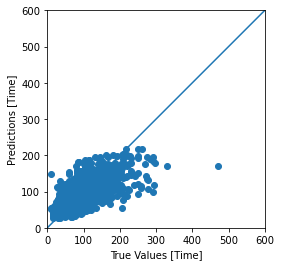

In [29]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_general, predictions)
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 600]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

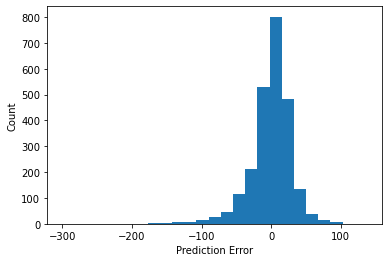

In [30]:
error = predictions - test_labels_general
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [31]:
dataset_predicton = {"Real Duration": test_labels_general, "Planned by Cuf": test_CUF_labels_general, "Labels from RuleFit": predictions}
dataset_predicton=pd.DataFrame(dataset_predicton)
dataset_predicton



,Real Duration,Planned by Cuf,Labels from RuleFit
0,40.0,60.0,46.159933
1,39.0,30.0,33.954977
2,43.0,60.0,52.796792
3,47.0,60.0,41.773352
4,43.0,60.0,41.773352
...,...,...,...
2438,127.0,210.0,162.531821
2439,47.0,60.0,33.531573
2440,44.0,90.0,80.609293
2441,76.0,60.0,106.389339


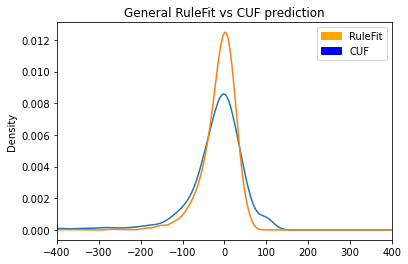

In [32]:

def percCal(x,y):
    return (x-y)*100/x

dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_RuleFit'].plot(kind='density')
plt.xlim([-400, 400])
plt.title('General RuleFit vs CUF prediction')
orange_patch = matplotlib.patches.Patch(color='orange', label='RuleFit')
blue_patch = matplotlib.patches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [18]:

def percCal(x,y):
    return (x-y)*100/x

In [33]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['RuleFit Model', RuleFit_Within, RuleFit_overuse,RuleFit_under]]
print(tabulate(table2))

-------------  -------------------  -------------------  -------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.20221039705280394  0.3168235775685632   0.4809660253786328
RuleFit Model  0.26606631191158414  0.29758493655341794  0.43634875153499797
-------------  -------------------  -------------------  -------------------


-----

# Design Rashomon Curve

In [11]:
number_of_rules=10

In [14]:


Rashomon_curve_general= {}

for j in range(0,2):
        # The Normalization layer
    Rashomon_curve_general[j] = {}

    for r in range(number_of_rules):
            # The Normalization layer
        Rashomon_curve_general[j][r] = {}


In [31]:
alphas=[]

for j in range(0,2):
    print(j)
    if j==0:
        train_dataset_general= Genenal_Dataset['TrainSet']
        test_dataset_general= Genenal_Dataset['TestSet']
        train_dataset_general_categorical=Genenal_Dataset['TrainSet'][Genenal_Dataset['TrainSet']['Real Room Duration']>100]
        test_dataset_general_categorical=Genenal_Dataset['TestSet'][Genenal_Dataset['TestSet']['Real Room Duration']>100]
        
        
    if j==1:
        train_dataset_general= df_train_general
        test_dataset_general= df_test_general
        train_dataset_general_categorical= df_train_general[df_train_general['Real Room Duration']>100]
        test_dataset_general_categorical= df_test_general[df_test_general['Real Room Duration']>100]
        
    
        
    r=1
    
    Parameters=Model_GeneralSynthetic[Tuning_models['Decision_Tree'][1]]["Best_params_dict"]
                                                                            
    Decison_Tree=Tuning_models['Decision_Tree'][1](random_state=123,learning_rate=Parameters["learning_rate"],max_depth=Parameters["max_depth"],n_estimators=Parameters["n_estimators"])
    print(Decison_Tree)



    regularizer=Tuning_models['Regularizers_1'][0]



    print(regularizer)

    Cs=Tuning_models['Cs']

    beta=0.1
    alpha=0.0001
    

    train_features_general = train_dataset_general.copy()

    train_labels_general = train_features_general.pop('Real Room Duration')

    train_CUF_labels_general = train_features_general.pop('CUF Planned Duration')
    
    test_features_general = test_dataset_general.copy()

    test_labels_general = test_features_general.pop('Real Room Duration')

    test_CUF_labels_general = test_features_general.pop('CUF Planned Duration')
    #-----
    
    

    train_features_general_categorical = train_dataset_general_categorical.copy()

    train_labels_general_categorical = train_features_general_categorical.pop('Real Room Duration')

    train_CUF_labels_general_categorical = train_features_general_categorical.pop('CUF Planned Duration')
    
    test_features_general_categorical = test_dataset_general_categorical.copy()

    test_labels_general_categorical = test_features_general_categorical.pop('Real Room Duration')

    test_CUF_labels_general_categorical = test_features_general_categorical.pop('CUF Planned Duration')




    #Dataset
    train_dataset_general= np.asarray(train_dataset_general).astype(np.float32)

    #Features
    train_features_general= np.asarray(train_features_general).astype(np.float32)

    #labels
    train_labels_general= np.asarray(train_labels_general).astype(np.float32)
    
    #Dataset
    train_dataset_general_categorical= np.asarray(train_dataset_general_categorical).astype(np.float32)

    #Features
    train_features_general_categorical= np.asarray(train_features_general_categorical).astype(np.float32)

    #labels
    train_labels_general_categorical= np.asarray(train_labels_general_categorical).astype(np.float32)
    
    
    ##---
    
    #Dataset
    test_dataset_general= np.asarray(test_dataset_general).astype(np.float32)

    #Features
    test_features_general= np.asarray(test_features_general).astype(np.float32)

    #labels
    test_labels_general= np.asarray(test_labels_general).astype(np.float32)
    
    #Dataset
    test_dataset_general_categorical= np.asarray(test_dataset_general_categorical).astype(np.float32)

    #Features
    test_features_general_categorical= np.asarray(test_features_general_categorical).astype(np.float32)

    #labels
    test_labels_general_categorical= np.asarray(test_labels_general_categorical).astype(np.float32)
    

    t=0
    for rules_n in range(number_of_rules):
        print(rules_n)

        max_rules=(10-rules_n)*10

        len_reduce_rules=1000

        while len_reduce_rules>max_rules:

            Decison_Tree_tune=copy.deepcopy(Decison_Tree)

            rf = RuleFit_withoutCV.RuleFit(tree_generator=Decison_Tree_tune,alpha=alpha, Cs=Cs, max_iter=10e10, regularization=regularizer,n_jobs=-1)



            rf.fit(train_features_general, train_labels_general, feature_names=generalcolumns)

            rules = rf.get_rules()

            reduce_rules = rules[abs(rules.coef) !=0].sort_values("coef", ascending=False)


            len_reduce_rules=len(reduce_rules)

            print(len_reduce_rules)

            rf_score_train = mean_squared_error(rf.predict(train_features_general),train_labels_general,squared=False)

          

            rf_score = mean_squared_error(rf.predict(test_features_general),test_labels_general,squared=False)

            
            predictions=rf.predict(test_features_general)

            if len_reduce_rules>200:
                alpha+=0.03

                
            if len_reduce_rules>max_rules+20:
                alpha+=0.02

            else:
                alpha+=0.015
                
        
            
        print(alphas)


        dataset_predicton = {"Real Duration": test_labels_general, "Planned by Cuf": test_CUF_labels_general, "Labels from RuleFit": predictions}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Rashomon_curve_general[j][rules_n].update({"Model": rf})
        Rashomon_curve_general[j][rules_n].update({"Rules": rules})

        Rashomon_curve_general[j][rules_n].update({"Rules_non0": reduce_rules})

        Rashomon_curve_general[j][rules_n].update({"Number Rules": len(reduce_rules)})
        Rashomon_curve_general[j][rules_n].update({"TestScore": rf_score})
        Rashomon_curve_general[j][rules_n].update({"TrainScore": rf_score_train})
        Rashomon_curve_general[j][rules_n].update({"Predictions": predictions})
        Rashomon_curve_general[j][rules_n].update({"Dataset_predicton": dataset_predicton})

        Rashomon_curve_general[j][rules_n].update({"Percentage": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        Rashomon_curve_general[j][rules_n].update({"Percentage_CUF": [CUF_Within, CUF_under, CUF_overuse]})
        
        predictions_train=rf.predict(train_features_general)
        
        rf_score_test =mean_squared_error(rf.predict(test_features_general),test_labels_general,squared=False)
        
        rf_score_train = mean_squared_error(rf.predict(train_features_general),train_labels_general,squared=False)
        
        
       
        
        rf_score_test_categorical = mean_squared_error(rf.predict(test_features_general_categorical),test_labels_general_categorical,squared=False)
        
        rf_score_train_categorical = mean_squared_error(rf.predict(train_features_general_categorical),train_labels_general_categorical,squared=False)
        

        dataset_predicton = {"Real Duration": train_labels_general, "Planned by Cuf": train_CUF_labels_general, "Labels from RuleFit": predictions_train}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

        Rashomon_curve_general[j][rules_n].update({"Score R2 Train": rf_score_train})
        Rashomon_curve_general[j][rules_n].update({"Score R2 Test": rf_score_test})
        Rashomon_curve_general[j][rules_n].update({"Score R2 Train Categorical": rf_score_train_categorical})
        Rashomon_curve_general[j][rules_n].update({"Score R2 Test Categorical": rf_score_test_categorical})
        
        Rashomon_curve_general[j][rules_n].update({"Percentage_Train": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        
        #------
        
        predictions_test_categorical=rf.predict(test_features_general_categorical)
        
        dataset_predicton = {"Real Duration": test_labels_general_categorical, "Planned by Cuf": test_CUF_labels_general_categorical, "Labels from RuleFit": predictions_test_categorical}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        
        Rashomon_curve_general[j][rules_n].update({"Percentage Test Categorical": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        
        
        #------
        
        predictions_train_categorical=rf.predict(train_features_general_categorical)
        
        dataset_predicton = {"Real Duration": train_labels_general_categorical, "Planned by Cuf": train_CUF_labels_general_categorical, "Labels from RuleFit": predictions_train_categorical}
        dataset_predicton=pd.DataFrame(dataset_predicton)

        dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
        dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])

        CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
        RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
        #Underutilization
        CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
        RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
            #Within
        CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]
        
        Rashomon_curve_general[j][rules_n].update({"Percentage Train Categorical": [RuleFit_Within, RuleFit_under, RuleFit_overuse]})
        


0
GradientBoostingRegressor(learning_rate=0.15, max_depth=4, n_estimators=1750,
                          random_state=123)
Lasso
0


Objective did not converge. You might want to increase the number of iterations. Duality gap: 62604608.446887285, tolerance: 48825.00740116336


1223


Objective did not converge. You might want to increase the number of iterations. Duality gap: 443467.33616894484, tolerance: 48825.00740116336


275
156
137
153
127
124
100
[]
1
103
101
81
[]
2
92
83
79
[]
3
73
69
[]
4
79
71
65
65
67
63
56
[]
5
59
59
57
52
52
52
48
[]
6
49
50
44
49
42
37
[]
7
43
39
45
39
42
37
30
[]
8
35
38
32
38
29
40
38
33
27
29
30
32
26
28
31
32
25
22
23
25
19
[]
9
25
25
24
26
21
21
21
25
19
28
18
21
20
16
19
18
19
24
21
19
20
15
16
18
17
19
16
18
15
16
13
18
17
14
17
17
17
17
17
15
19
14
17
15
14
16
16
15
14
17
17
15
14
12
14
9
[]


In [29]:

def percCal(x,y):
    return (x-y)*100/x


In [33]:
%store -r Rashomon_curve_general

In [35]:
# save the model to disk
Curve=0

rules=[100,90,80,70,60,50,40,30,20,10]


for i in range(len(rules)):
    
    Best_model=Rashomon_curve_general[Curve][i]['Model']
    
    filename="RuleFit_Imbalanced_{}.sav".format(rules[i])
    print(filename)
    pickle.dump(Best_model, open(filename, 'wb'))

RuleFit_Imbalanced_100.sav
RuleFit_Imbalanced_90.sav
RuleFit_Imbalanced_80.sav
RuleFit_Imbalanced_70.sav
RuleFit_Imbalanced_60.sav
RuleFit_Imbalanced_50.sav
RuleFit_Imbalanced_40.sav
RuleFit_Imbalanced_30.sav
RuleFit_Imbalanced_20.sav
RuleFit_Imbalanced_10.sav


In [36]:
# save the model to disk
Curve=1

rules=[100,90,80,70,60,50,40,30,20,10]


for i in range(len(rules)):
    
    Best_model=Rashomon_curve_general[Curve][i]['Model']
    
    filename="RuleFit_WithoutImbalanced_{}.sav".format(rules[i])
    print(filename)
    pickle.dump(Best_model, open(filename, 'wb'))

RuleFit_WithoutImbalanced_100.sav
RuleFit_WithoutImbalanced_90.sav
RuleFit_WithoutImbalanced_80.sav
RuleFit_WithoutImbalanced_70.sav
RuleFit_WithoutImbalanced_60.sav
RuleFit_WithoutImbalanced_50.sav
RuleFit_WithoutImbalanced_40.sav
RuleFit_WithoutImbalanced_30.sav
RuleFit_WithoutImbalanced_20.sav
RuleFit_WithoutImbalanced_10.sav


----

In [33]:
curve=0

 

In [34]:
Score_test=[]
Score_train=[]
Number_of_rules=[]
Within_Test=[]
Within_Train=[]
Diference_error=[]

for rules_n in range(number_of_rules):

    Score_train_intercalar=abs(Rashomon_curve_general[curve][rules_n]['Score R2 Train Categorical'])
    Score_test_intercalar=abs(Rashomon_curve_general[curve][rules_n]['Score R2 Test Categorical'])
    Number_of_rules_intercalar=Rashomon_curve_general[curve][rules_n]['Number Rules']
    Within_intercalar_test=Rashomon_curve_general[curve][rules_n]['Percentage Test Categorical'][0]
    Within_intercalar_train=Rashomon_curve_general[curve][rules_n]['Percentage Train Categorical'][0]
     

    Score_test+=[Score_test_intercalar]
    Score_train+=[Score_train_intercalar]
    Diference_error+=[abs(Score_test_intercalar-Score_train_intercalar)]
    Number_of_rules+=[Number_of_rules_intercalar]
    Within_Test+=[Within_intercalar_test]
    Within_Train+=[Within_intercalar_train]

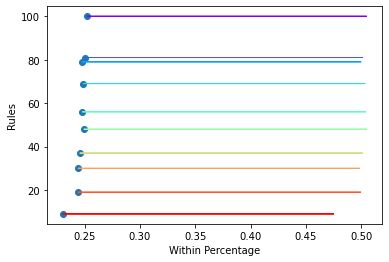

<Figure size 720x720 with 0 Axes>

In [35]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Within_Train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Within_Train[i],y=Number_of_rules[i],dx=Within_Test[i],dy=0,color=next(colors))


plt.xlabel('Within Percentage')
plt.ylabel('Rules')
plt.figure(figsize=(10,10))
plt.show()

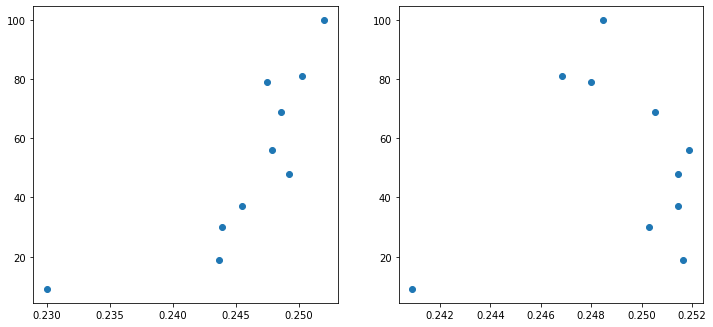

In [36]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)

colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


ax1.scatter(Within_Train, Number_of_rules)

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(Within_Test, Number_of_rules)

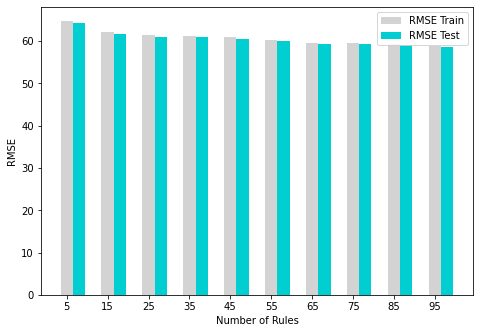

In [37]:
import numpy as np
import matplotlib.pyplot as plt

Rev_Score_train=Score_train[::-1]
Rev_Score_test=Score_test[::-1]

X = np.arange(5,105,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Rev_Score_train, color = 'lightgrey', width =3)
ax.bar(X +3,Rev_Score_test , color = 'darkturquoise', width =3)
plt.ylabel('RMSE')   
plt.xlabel('Number of Rules')
plt.xticks(X)  
ax.legend(['RMSE Train','RMSE Test'])

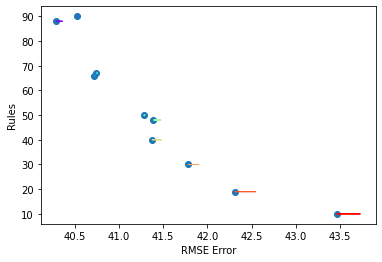

<Figure size 720x720 with 0 Axes>

In [12]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))

plt.xlabel('RMSE Error')
plt.ylabel('Rules')

plt.scatter(Score_train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Score_train[i],y=Number_of_rules[i],dx=Diference_error[i],dy=0,color=next(colors))

    
plt.figure(figsize=(10,10))
plt.show()

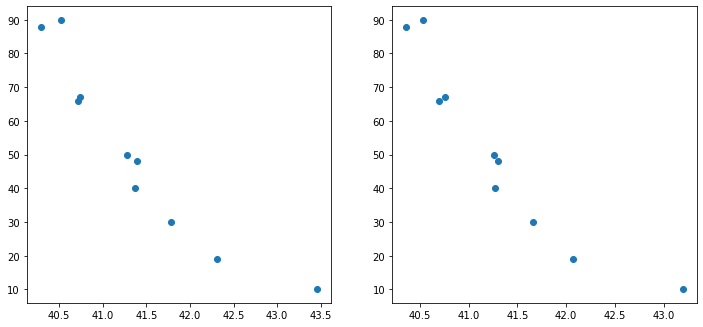

In [13]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)

colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


ax1.scatter(Score_train, Number_of_rules)

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(Score_test, Number_of_rules)

In [16]:
curve=1

Score_test=[]
Score_train=[]
Number_of_rules=[]
Within_Test=[]
Within_Train=[]
Diference_error=[]

for rules_n in range(number_of_rules):

    Score_train_intercalar=abs(Rashomon_curve_general[curve][rules_n]['Score R2 Train Categorical'])
    Score_test_intercalar=abs(Rashomon_curve_general[curve][rules_n]['Score R2 Test Categorical'])
    Number_of_rules_intercalar=Rashomon_curve_general[curve][rules_n]['Number Rules']
    Within_intercalar_test=Rashomon_curve_general[curve][rules_n]['Percentage Test Categorical'][0]
    Within_intercalar_train=Rashomon_curve_general[curve][rules_n]['Percentage Train Categorical'][0]
     

    Score_test+=[Score_test_intercalar]
    Score_train+=[Score_train_intercalar]
    Diference_error+=[abs(Score_test_intercalar-Score_train_intercalar)]
    Number_of_rules+=[Number_of_rules_intercalar]
    Within_Test+=[Within_intercalar_test]
    Within_Train+=[Within_intercalar_train]

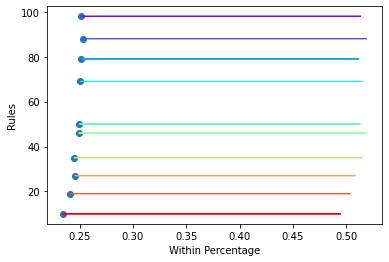

<Figure size 720x720 with 0 Axes>

In [17]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))


plt.scatter(Within_Train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Within_Train[i],y=Number_of_rules[i],dx=Within_Test[i],dy=0,color=next(colors))


plt.xlabel('Within Percentage')
plt.ylabel('Rules')
plt.figure(figsize=(10,10))
plt.show()

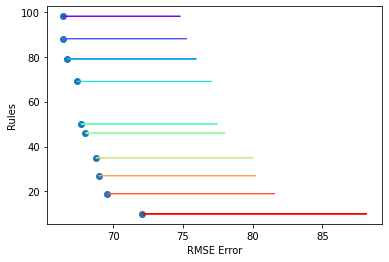

<Figure size 720x720 with 0 Axes>

In [18]:
colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(Score_train))))

plt.xlabel('RMSE Error')
plt.ylabel('Rules')

plt.scatter(Score_train, Number_of_rules)
for i in range(len(Number_of_rules)):
    
    plt.arrow(x=Score_train[i],y=Number_of_rules[i],dx=Diference_error[i],dy=0,color=next(colors))

    
plt.figure(figsize=(10,10))
plt.show()

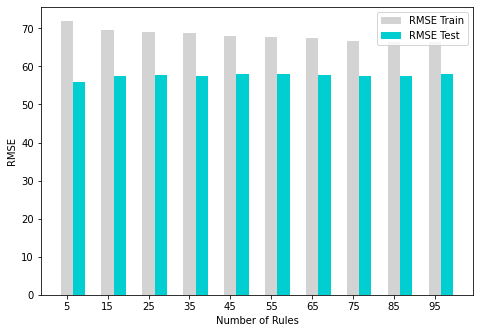

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Rev_Score_train=Score_train[::-1]
Rev_Score_test=Score_test[::-1]

X = np.arange(5,105,10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, Rev_Score_train, color = 'lightgrey', width =3)
ax.bar(X +3,Rev_Score_test , color = 'darkturquoise', width =3)
plt.ylabel('RMSE')   
plt.xlabel('Number of Rules')
plt.xticks(X)  
ax.legend(['RMSE Train','RMSE Test'])

* ## 5 seems the optimal value in Rashomon elbow

In [13]:
curve=1
value=2

In [14]:
Best_model=Rashomon_curve_general[curve][value]['Model']

In [15]:
len(Rashomon_curve_general[curve][value]['Rules_non0'])

79

In [16]:
dataset_predicton=Rashomon_curve_general[curve][value]['Dataset_predicton']

In [17]:
mean_squared_error(dataset_predicton['Labels from RuleFit'],dataset_predicton['Real Duration'],squared=False)

37.347992422059086

In [18]:
mean_squared_error(dataset_predicton['Planned by Cuf'],dataset_predicton['Real Duration'],squared=False)

46.59143288911107

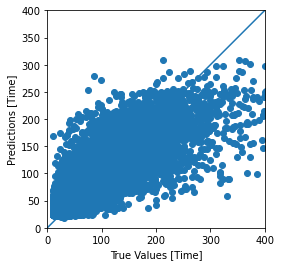

In [19]:
a = plt.axes(aspect='equal')
plt.scatter(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 400]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

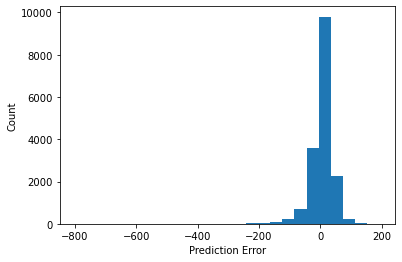

In [20]:
error = dataset_predicton['Labels from RuleFit'] - dataset_predicton['Real Duration']
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

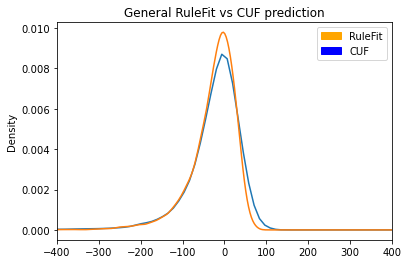

In [21]:

def percCal(x,y):
    return (x-y)*100/x


def percCal2(x,y):
    return abs(x-y)


dataset_predicton['Error_RuleFit'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])
dataset_predicton['Minutes_RuleFit'] = percCal2(dataset_predicton['Real Duration'], dataset_predicton['Labels from RuleFit'])
dataset_predicton['Minutes_CUF'] = percCal2(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])



dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_RuleFit'].plot(kind='density')
plt.xlim([-400, 400])
plt.title('General RuleFit vs CUF prediction')
orange_patch = matplotlib.patches.Patch(color='orange', label='RuleFit')
blue_patch = matplotlib.patches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [22]:
dataset_predicton['Minutes_CUF'].sum()/16977 

27.757200918890263

In [23]:
dataset_predicton['Minutes_RuleFit'].sum()/16977

25.153936795941863

In [24]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
RuleFit_overuse=dataset_predicton[dataset_predicton['Error_RuleFit']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
RuleFit_under=dataset_predicton[dataset_predicton['Error_RuleFit']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
RuleFit_Within=dataset_predicton[dataset_predicton['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['RuleFit Model', RuleFit_Within, RuleFit_overuse,RuleFit_under]]
print(tabulate(table2))

-------------  -------------------  -------------------  ------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.1920245037403546   0.28626965895034456  0.5217058373093009
RuleFit Model  0.19891618071508513  0.25216469340872943  0.5489191258761854
-------------  -------------------  -------------------  ------------------


In [25]:
dataset_predicton['Labels from RuleFit'].to_csv('Labels_RuleFit_speciality_notimbalance',index=False)

In [26]:
np.round(mean_squared_error(dataset_predicton['Labels from RuleFit'],dataset_predicton['Real Duration'],squared=False))
       

37.0

In [27]:
np.round(mean_squared_error(dataset_predicton['Planned by Cuf'],dataset_predicton['Real Duration'],squared=False))


47.0

* Generalization Set

In [28]:
generalization_dataset_general=Genenal_Dataset['GeneralizationSet_After_Encoding']

generalization_features_general = generalization_dataset_general.copy()
generalization_labels_general = generalization_features_general.pop('Real Room Duration')
generalization_CUF_labels_general = generalization_features_general.pop('CUF Planned Duration')

generalization_dataset_general= np.asarray(generalization_dataset_general).astype(np.float32)

    #Features
generalization_features_general= np.asarray(generalization_features_general).astype(np.float32)

#labels
generalization_labels_general= np.asarray(generalization_labels_general).astype(np.float32)

In [29]:
labels_generalization=Best_model.predict(generalization_features_general)
dataset_predicton_generalization = {"Real Duration": generalization_labels_general, "Planned by Cuf": generalization_CUF_labels_general, "Labels from RuleFit": labels_generalization}
    
dataset_predicton_generalization=pd.DataFrame(dataset_predicton_generalization)
dataset_predicton_generalization

,Real Duration,Planned by Cuf,Labels from RuleFit
12851,55.0,60,63.800718
1693,11.0,60,30.119253
45971,19.0,30,24.316411
115148,21.0,45,23.858327
90790,86.0,90,65.567639
...,...,...,...
86160,20.0,30,43.222014
11998,39.0,120,46.401124
161399,12.0,60,37.917473
99179,156.0,120,201.326475


In [30]:
dataset=dataset_predicton_generalization[dataset_predicton_generalization['Real Duration']>100]

In [31]:
mean_squared_error(dataset['Labels from RuleFit'],dataset['Real Duration'],squared=False)

57.168439142737014

In [32]:
mean_squared_error(dataset['Planned by Cuf'],dataset['Real Duration'],squared=False)

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


61.67411473682803

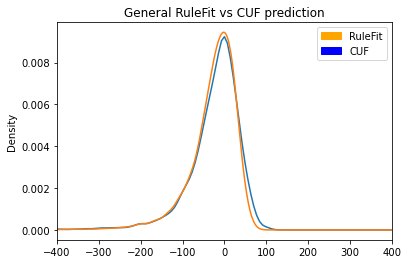

In [66]:

def percCal(x,y):
    return (x-y)*100/x

def percCal2(x,y):
    return abs(x-y)


dataset_predicton_generalization['Error_RuleFit'] = percCal(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Labels from RuleFit'])
dataset_predicton_generalization['Error_CUF'] = percCal(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Planned by Cuf'])
dataset_predicton_generalization['Minutes_RuleFit'] = percCal2(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Labels from RuleFit'])
dataset_predicton_generalization['Minutes_CUF'] = percCal2(dataset_predicton_generalization['Real Duration'], dataset_predicton_generalization['Planned by Cuf'])


dataset_predicton_generalization['Error_CUF'].plot(kind='density')
dataset_predicton_generalization['Error_RuleFit'].plot(kind='density')
plt.xlim([-400, 400])
plt.title('General RuleFit vs CUF prediction')
orange_patch = matplotlib.patches.Patch(color='orange', label='RuleFit')
blue_patch = matplotlib.patches.Patch(color='blue', label='CUF')
plt.legend(handles=[orange_patch,blue_patch])

In [67]:
#Overutilization 
CUF_overuse=dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']>10].shape[0]/dataset_predicton_generalization.shape[0]
RuleFit_overuse=dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']>10].shape[0]/dataset_predicton_generalization.shape[0]
#Underutilization
CUF_under=dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']<-10].shape[0]/dataset_predicton_generalization.shape[0]
RuleFit_under=dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']<-10].shape[0]/dataset_predicton_generalization.shape[0]
#Within
CUF_Within=dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF'].abs()<=10].shape[0]/dataset_predicton_generalization.shape[0]
RuleFit_Within=dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit'].abs()<=10].shape[0]/dataset_predicton_generalization.shape[0]

table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['RuleFit Model', RuleFit_Within, RuleFit_overuse,RuleFit_under]]
print(tabulate(table2))

-------------  -------------------  ------------------  ------------------
Model          Within               Overutilization     Underutilization
CUF Model      0.19773811627496024  0.2879189491665194  0.5143429345585203
RuleFit Model  0.19314366495847324  0.2544030158449667  0.55245331919656
-------------  -------------------  ------------------  ------------------


In [68]:
dataset_predicton_generalization['Minutes_CUF'].sum()/16977

26.87235671791247

In [69]:
dataset_predicton_generalization['Minutes_RuleFit'].sum()/16977

25.12227074579028

In [72]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']<-10]['Minutes_RuleFit'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']<-10].shape[0]

26.686692050003458

In [73]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']<-10]['Minutes_CUF'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']<-10].shape[0]

29.140174072377462

In [74]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']>10]['Minutes_RuleFit'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_RuleFit']>10].shape[0]

37.43321664490592

In [75]:
dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']>10]['Minutes_CUF'].sum()/dataset_predicton_generalization[dataset_predicton_generalization['Error_CUF']>10].shape[0]

38.32262684124386

In [60]:
np.round(mean_squared_error(labels_generalization,generalization_labels_general,squared=False))
        
        

37.0

In [61]:
np.round(mean_squared_error(generalization_CUF_labels_general,generalization_labels_general,squared=False))


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


43.0

* Imbalance

In [20]:
curve=0
value=3

In [21]:
len(Rashomon_curve_general[curve][value]['Rules_non0'])

67

In [61]:
Best_model=Rashomon_curve_general[curve][value]['Model']


In [62]:
dataset_predicton=Rashomon_curve_general[curve][value]['Dataset_predicton']
dataset_predicton

,Real Duration,Planned by Cuf,Labels from RuleFit,Error_RuleFit,Error_CUF
0,41.0,60,43.599646,-6.340599,-46.341463
3,55.0,60,50.215911,8.698344,-9.090909
4,12.0,60,33.711367,-180.928058,-400.0
30,53.0,60,105.581556,-99.210484,-13.207547
34,55.0,30,59.852519,-8.822762,45.454545
...,...,...,...,...,...
169753,19.0,20,24.602777,-29.488298,-5.263158
169755,90.0,90,77.851826,13.497971,0.0
169760,94.0,60,28.094434,70.112305,36.170213
169763,33.0,60,33.064070,-0.194150,-81.818182


In [63]:
dataset_predicton['Labels from RuleFit'].to_csv('Labels_RuleFit_speciality_imbalance',index=False)

